In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import re

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import os

In [5]:
os.listdir(r"C:\Amazon")

['Reviews.csv']

In [7]:
df = pd.read_csv(r"C:\Amazon/Reviews.csv")

In [9]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [13]:
 #Display basic dataset information
print("Dataset Shape:", df.shape)
print("Dataset Head:")
display(df.head())

Dataset Shape: (568454, 10)
Dataset Head:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [25]:
#Handle Missing Values
print("Missing Values Before Cleaning:")
display(df.isnull().sum())
df.dropna(inplace=True)
print("Missing Values After Cleaning:")
display(df.isnull().sum())

Missing Values Before Cleaning:


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Missing Values After Cleaning:


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [27]:
# Use set for faster stopword lookup
stop_words = set(stopwords.words('english'))

In [29]:
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase & ensure it's a string
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation & numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [31]:
# Apply function with tqdm progress tracking
tqdm.pandas()
df['cleaned_text'] = df['Text'].progress_apply(clean_text)

100%|██████████| 568401/568401 [07:54<00:00, 1198.66it/s]


C:\Users\HP\AppData\Local\Temp\ipykernel_13052\61092111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='Blues')


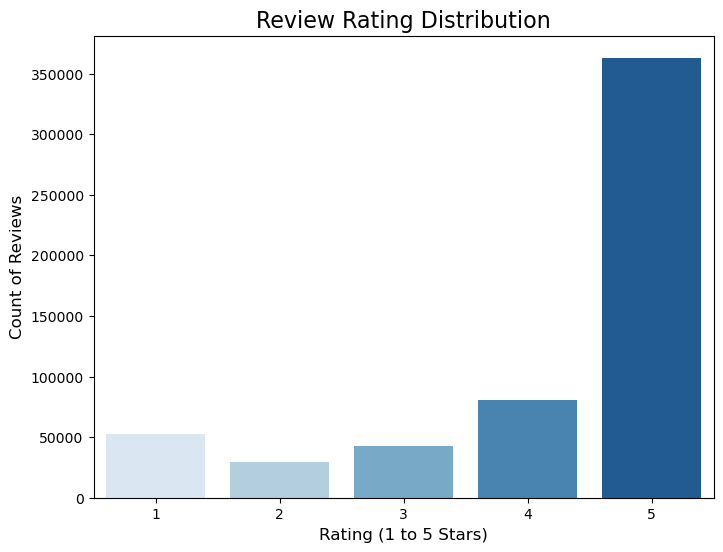

In [33]:
 #Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df, palette='Blues')
plt.title('Review Rating Distribution', fontsize=16)
plt.xlabel('Rating (1 to 5 Stars)', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [37]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [39]:
def vader_sentiment(text):
    """Assigns sentiment labels using VADER."""
    scores = analyzer.polarity_scores(str(text))  # Ensure text is a string
    if scores['compound'] >= 0.5:
        return "Positive"
    elif scores['compound'] <= -0.5:
        return "Negative"
    else:
        return "Neutral"

In [42]:
# Apply VADER Sentiment Analysis
df['VADER_Sentiment'] = df['Text'].apply(vader_sentiment)

C:\Users\HP\AppData\Local\Temp\ipykernel_13052\2398076769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VADER_Sentiment', palette='coolwarm')


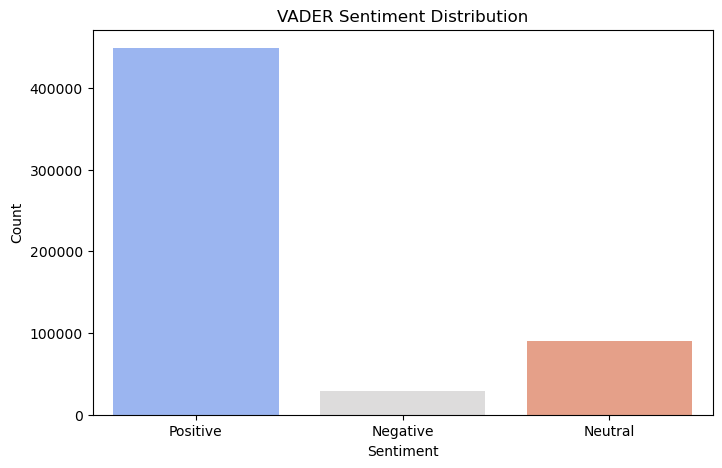

In [44]:
# Plot VADER Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='VADER_Sentiment', palette='coolwarm')
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
!pip install transformers --no-cache-dir

In [ ]:
!pip install tensorflow --no-cache-dir

In [ ]:
!pip install --upgrade tensorflow --no-cache-dir

In [47]:
from transformers import pipeline

In [ ]:
!pip install tf-keras --no-cache-dir

In [48]:
# Limit dataset to 1000 rows for faster processing
df = df.sample(1000, random_state=42)

In [49]:
# Initialize BERT Sentiment Analyzer
bert_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


In [53]:
def bert_sentiment(text):
    """Assigns sentiment labels using BERT."""
    result = bert_classifier(text[:512])[0]  # Limit to 512 tokens
    return result["label"]

In [55]:
# Apply BERT Sentiment Analysis
df['BERT_Sentiment'] = df['Text'].apply(lambda x: bert_sentiment(str(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_13052\4246622949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BERT_Sentiment', palette='viridis')


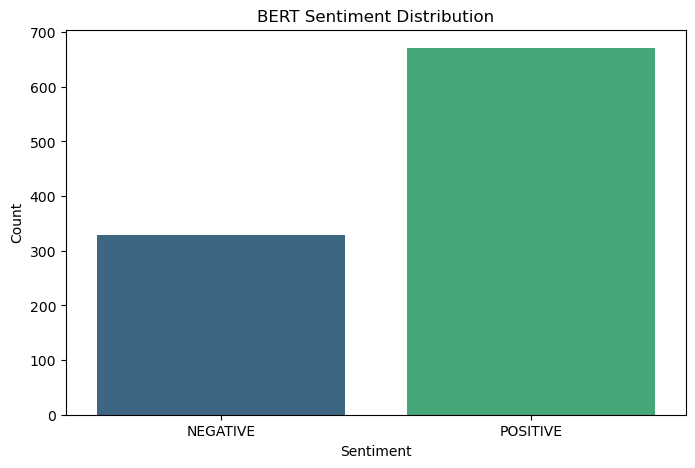

In [56]:
# Plot BERT Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='BERT_Sentiment', palette='viridis')
plt.title("BERT Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [141]:
from sklearn.metrics import accuracy_score, classification_report

In [143]:
true_labels = ['Positive', 'Negative', 'Positive', 'Positive', 'Negative']
bert_preds = ['Positive', 'Negative', 'Positive', 'Negative', 'Negative']
vader_preds = ['Positive', 'Positive', 'Positive', 'Positive', 'Negative']

In [145]:
# Calculate accuracy
bert_accuracy = accuracy_score(true_labels, bert_preds)
vader_accuracy = accuracy_score(true_labels, vader_preds)

In [147]:
print("BERT Accuracy:", bert_accuracy)
print("VADER Accuracy:", vader_accuracy)


BERT Accuracy: 0.8
VADER Accuracy: 0.8


In [149]:
# Classification report
print("\nBERT Report:\n", classification_report(true_labels, bert_preds))
print("\nVADER Report:\n", classification_report(true_labels, vader_preds))


BERT Report:
               precision    recall  f1-score   support

    Negative       0.67      1.00      0.80         2
    Positive       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5


VADER Report:
               precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
    Positive       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [61]:
# Convert Sentiment Labels to Numerical Values
df['Sentiment_Label'] = df['VADER_Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

In [63]:
# Feature Extraction using TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Text'])
y = df['Sentiment_Label']

In [65]:
# Split dataset into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [67]:
# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_preds))

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         9
           0       0.00      0.00      0.00        36
           1       0.78      1.00      0.87       155

    accuracy                           0.78       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.60      0.78      0.68       200



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Train SVM Model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

SVM Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         9
           0       0.00      0.00      0.00        36
           1       0.77      0.99      0.87       155

    accuracy                           0.77       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.60      0.77      0.67       200



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
data = {
    'Model': ['BERT', 'VADER', 'SVM', 'Naive Bayes'],
    'Accuracy': [0.80, 0.80, 0.77, 0.78],
    'Precision': [0.87, 0.85, 0.60, 0.60],
    'Recall': [0.80, 0.80, 0.78, 0.77],
    'F1-Score': [0.80, 0.78, 0.67, 0.68]
}
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
print(df)

             Accuracy  Precision  Recall  F1-Score
Model                                             
BERT             0.80       0.87    0.80      0.80
VADER            0.80       0.85    0.80      0.78
SVM              0.77       0.60    0.78      0.67
Naive Bayes      0.78       0.60    0.77      0.68


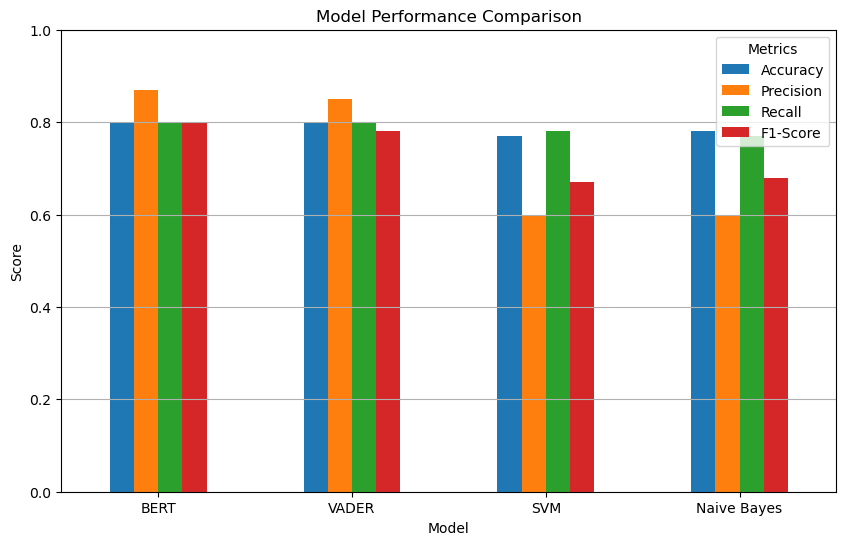

In [161]:
df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)  # because metrics are between 0 and 1
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [79]:
#Generate synthetic attribute sentiments
np.random.seed(42)
df['Quality'] = np.random.choice(['Positive', 'Negative'], size=len(df), p=[0.7, 0.3])
df['Price'] = np.random.choice(['Positive', 'Negative'], size=len(df), p=[0.5, 0.5])
df['Packaging'] = np.random.choice(['Positive', 'Negative'], size=len(df), p=[0.6, 0.4])

In [81]:
# Count positive and negative mentions per attribute
attributes = ['Quality', 'Price', 'Packaging']
sentiment_counts = {attr: df[attr].value_counts() for attr in attributes}

In [83]:
# Convert to DataFrame for visualization
attribute_sentiments = pd.DataFrame(sentiment_counts).T
attribute_sentiments.reset_index(inplace=True)
attribute_sentiments.columns = ['Attribute', 'Positive', 'Negative']

In [85]:
# Melt for stacked bar plot
attribute_sentiments_melted = attribute_sentiments.melt(id_vars='Attribute', var_name='Sentiment', value_name='Count')

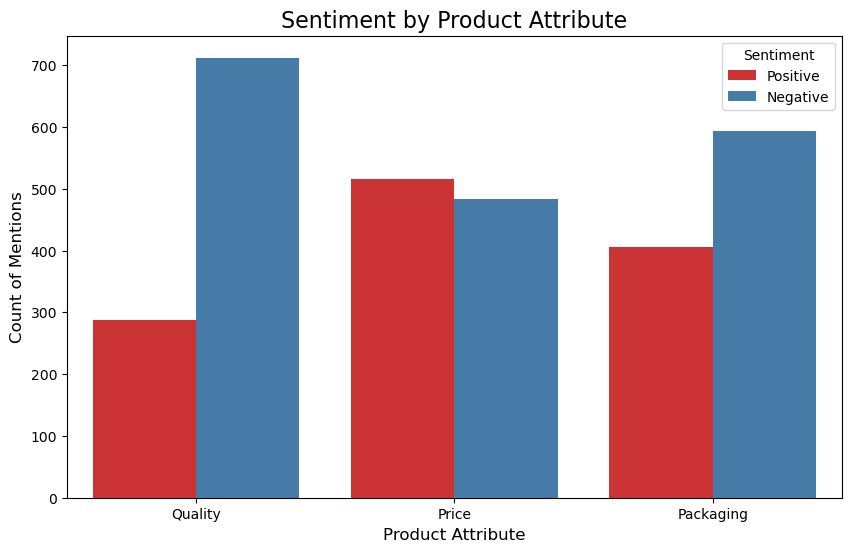

In [87]:
# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Attribute', y='Count', hue='Sentiment', data=attribute_sentiments_melted, palette='Set1')
plt.title('Sentiment by Product Attribute', fontsize=16)
plt.xlabel('Product Attribute', fontsize=12)
plt.ylabel('Count of Mentions', fontsize=12)
plt.legend(title='Sentiment')
plt.show()

In [89]:
df["Date"] = pd.to_datetime(df["Time"], unit='s')
df["Month"] = df["Date"].dt.to_period("M") 

In [91]:
monthly_sentiment = df.groupby(["Month", "BERT_Sentiment"]).size().unstack()

<Figure size 1200x600 with 0 Axes>

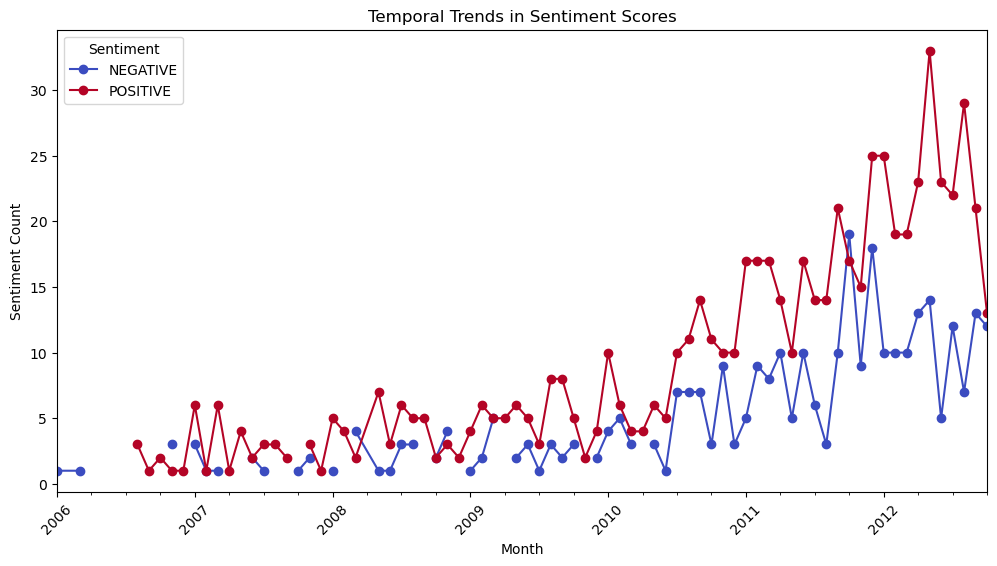

In [93]:
plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind="line", marker='o', figsize=(12, 6), colormap="coolwarm")
plt.title("Temporal Trends in Sentiment Scores")
plt.xlabel("Month")
plt.ylabel("Sentiment Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [97]:
 #Ensure the correct sentiment column is used
if 'Sentiment' in df.columns:
    sentiment_col = 'Sentiment'
elif 'VADER_Sentiment' in df.columns:
    sentiment_col = 'VADER_Sentiment'
elif 'BERT_Sentiment' in df.columns:
    sentiment_col = 'BERT_Sentiment'
else:
    raise ValueError("No valid Sentiment column found in the dataset!")

In [99]:
# Map Sentiment Labels to Numerical Values
df['Label'] = df[sentiment_col].map({'Positive': 1, 'Negative': 0, 'Neutral': -1})

In [101]:
# Ensure no missing values in text data
X = df['Text'].fillna('').values
y = df['Label'].dropna().values

In [105]:
# Convert text to feature vectors
vectorizer = CountVectorizer(max_features=5000)
X_features = vectorizer.fit_transform(X)

In [107]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [109]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [111]:
# Predict on test data
y_pred = rf_model.predict(X_test)

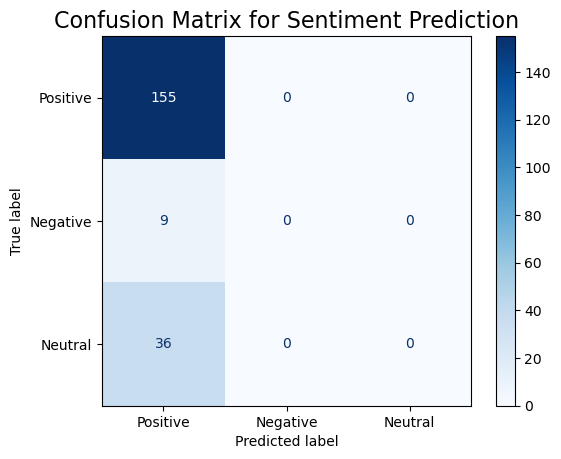

In [113]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative', 'Neutral'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Sentiment Prediction', fontsize=16)
plt.show()

In [15]:
# Identify frequent reviewers
reviewer_counts = df['UserId'].value_counts()
frequent_reviewers = reviewer_counts[reviewer_counts > 5].index

In [17]:
df['Reviewer_Type'] = df['UserId'].apply(lambda x: 'Frequent' if x in frequent_reviewers else 'Non-Frequent')

C:\Users\HP\AppData\Local\Temp\ipykernel_16652\1784952373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reviewer_Type', data=df, palette='muted')


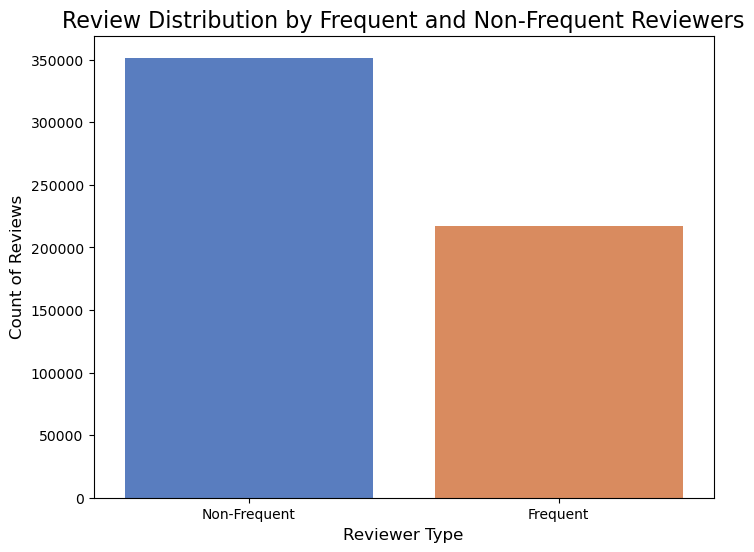

In [19]:
# Plot distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Reviewer_Type', data=df, palette='muted')
plt.title('Review Distribution by Frequent and Non-Frequent Reviewers', fontsize=16)
plt.xlabel('Reviewer Type', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()